In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def clean_data(filepath):
    df = pd.read_csv(os.path.join(filepath))
    df = df.dropna(subset=['Days of Ice Cover'])
    df["Winter"] = df['Winter'].str[:4].astype(int)
    df["Days of Ice Cover"] = df["Days of Ice Cover"].astype(int)
    filtered = df.loc[(df['Winter'] >= 1855) & (df['Winter'] <= 2022)]
    filtered = filtered[['Winter', 'Days of Ice Cover']]
    filtered = filtered.rename(columns={'Winter': 'year', 'Days of Ice Cover': 'days'})
    filtered.to_csv('hw5.csv', index=False) 

In [3]:
clean_data("Ice.csv")

In [4]:
# make sure to add the import sys and filename = sys.argv[1], learning_rate = float(sys.argv[2]), iterations = int(sys.argv[3])
def vis(filename):
    df = pd.read_csv(os.path.join(filename))
    plt.plot(df['year'], df['days'])
    plt.xlabel('Year')
    plt.ylabel('Number of Ice-Covered Days')
    plt.title('Icy Days As a Function of Year')
    plt.savefig("data_plot.jpg")

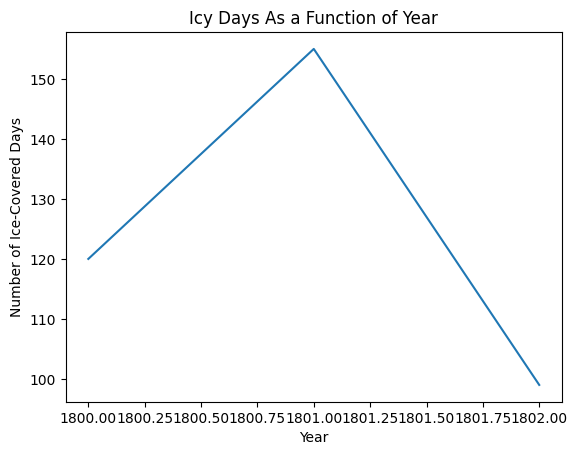

In [5]:
vis("toy.csv")

In [6]:
import numpy as np

In [7]:
def q3(csvfile):
    data = pd.read_csv(csvfile)
    data["year"] = data["year"].astype(int)
    data["year"] = (data["year"] - min(data["year"])) / (max(data["year"]) - min(data["year"]))
    n = len(data)
    aarr = np.ones((n,2))
    aarr[:, 0] = data["year"]
    return aarr

In [8]:
print("Q3:")
print(q3("toy.csv"))

Q3:
[[0.  1. ]
 [0.5 1. ]
 [1.  1. ]]


In [9]:
def q4(sX, filename):
    data = pd.read_csv(filename)
    data["days"] = data["days"].astype(int)
    Y = data["days"].to_numpy()
    wb = np.matmul(np.linalg.inv(np.matmul(sX.transpose(), sX)) , np.matmul(sX.transpose(), Y))
    return wb

In [10]:
print("Q3:")
print(q4(q3("toy.csv"), "toy.csv"))

Q3:
[-21.         135.16666667]


In [15]:
def grad_desc(alpha, rang):
    data = q3("hw5.csv")
    ys = pd.read_csv("hw5.csv")["days"].astype(int)
    n = len(data)
    wb = np.zeros(2)
    loss_data = []
    for iteration in range(rang):

        if iteration % 10 == 0:
            print(wb)

        loss_sum = 0
        for i in range(n):
            loss_sum += (wb[0] * data[i, 0] + wb[1] - ys[i])**2
        loss = 1 / (2*n) * loss_sum
        loss_data.append(loss)
        
        # re-assign the weight and bias
        
        yihat = np.matmul(wb.transpose(), data.transpose())
        grad = 1/n * np.matmul(np.subtract(yihat, ys), data)
        wb = wb - alpha * grad
    
    iterations_data = [i for i in range(rang)] # these will be the x values
    plt.plot(iterations_data, loss_data)
    plt.savefig("data_plot.jpg")
    return wb
# got alpha = 0.18, rang = 400

[0. 0.]
[26.32707504 60.6905683 ]
[29.85874782 78.07794303]
[27.72460751 84.19057626]
[24.32655519 87.29165676]
[20.78657199 89.51797045]
[17.38199865 91.42667141]
[14.17322067 93.16732406]
[11.16541623 94.78404511]
[ 8.35020345 96.29341097]


array([ 5.71633238, 97.70456303])

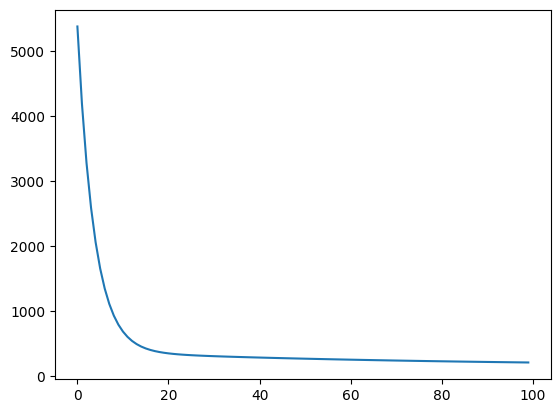

In [16]:
grad_desc(0.1, 100)

Q5a:
[ 5.88333333 12.46666667]
[31.58342165 77.92356558]
[32.46548512 97.64051837]
[ 27.77467196 105.43328864]
[ 22.27924866 109.87506571]
[ 17.10797051 113.16934493]
[ 12.4810104  115.90862893]
[  8.39734969 118.27475846]
[  4.80711283 120.34207639]
[  1.65417006 122.15434222]
[ -0.85300297 123.59470161]


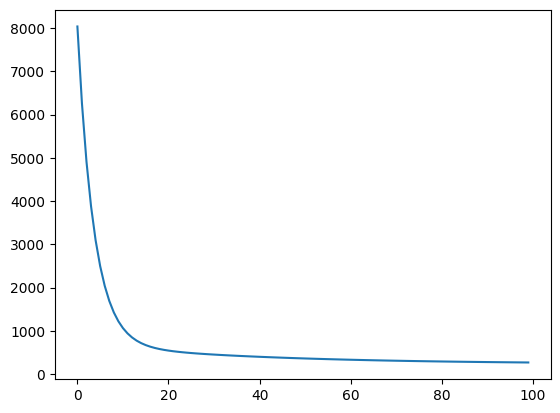

In [16]:
print("Q5a:")
print(grad_desc(0.1, 100))

In [17]:
print("Q5b: 0.18")
print("Q5c: 400")

Q5b: 0.18
Q5c: 400


In [18]:
def q6(filename):
    wb = q4(q3(filename))
    data = pd.read_csv(filename)
    data["year"] = data["year"].astype(int)
    computation = (2023 - min(data["year"])) / (max(data["year"]) - min(data["year"]))
    answer = wb[0] * computation + wb[1]
    return answer

In [19]:
print("Q6: " + str(q6("toy.csv")))

Q6: -2206.333333333327


In [20]:
def q7(w):
    w = int(w)
    if w < 0:
        return "<"
    elif w > 0:
        return ">"
    elif w == 0:
        return "="

In [22]:
print("Q7a: " + q7(q4(q3("toy.csv"))[0]))

Q7a: <


In [32]:
print("Q7b: A weight greater than zero indicates that the when the year increases by one unit, the number of ice days increases by an amount w. A weight less than zero indicates that when the year increases by 1 unit, the number of ce days decreases by an amount absolute value of w. A weight of zero indicates that the amount of ice days is not affected by this feature")

Q7b: A weight greater than zero indicates that the when the year increases by one unit, the number of ice days increases by an amount w. A weight less than zero indicates that when the year increases by 1 unit, the number of ce days decreases by an amount absolute value of w. A weight of zero indicates that the amount of ice days is not affected by this feature


In [44]:
def q8():
    wb = q4(q3("toy.csv"), "toy.csv")
    data = pd.read_csv("toy.csv")
    data["year"] = data["year"].astype(int)
    x_star = (-wb[1] * (max(data["year"]) - min(data["year"])) / wb[0]) + min(data["year"])
    return x_star

In [45]:
print("Q8a: " + str(q8()))

Q8a: 1812.873015873016
